##### Name - Shunottara Alhat

# Assignment 15 - Q1 - Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

##### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from collections import Counter
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

##### Import Data

In [2]:
CompData = pd.read_csv("Company_Data.csv")
CompData

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Explorary Data Analysis 

In [3]:
# Info

CompData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Missing Value

CompData.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
# Shape
CompData.shape

(400, 11)

In [6]:
# Duplicates
CompData.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [7]:
# Describe
CompData.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Features Engineering 

In [8]:
CompData.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

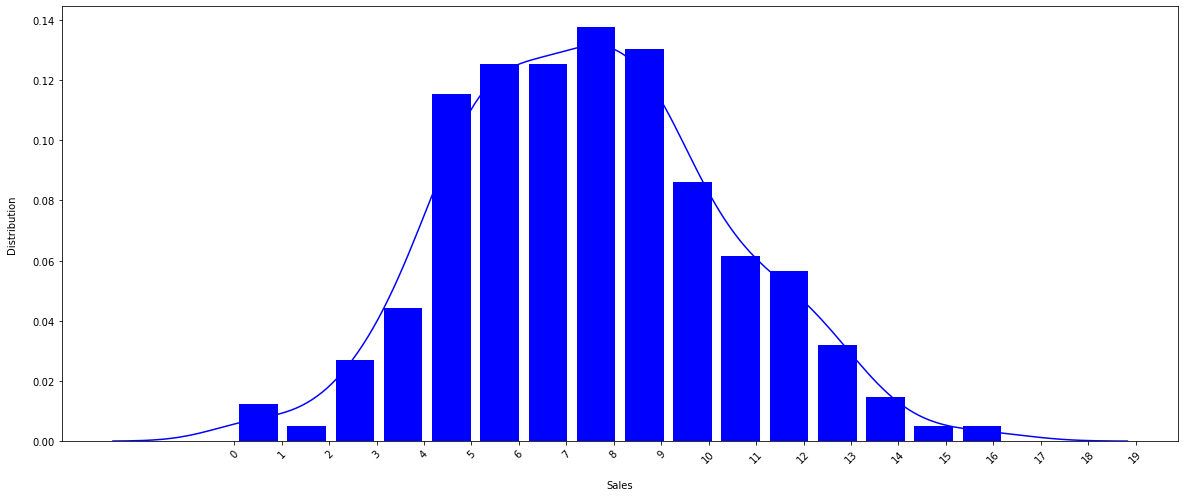

In [9]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(CompData[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

In [10]:
print("Sales Max :",CompData.Sales.max())
print("Sales Max /3 :",16.270000/3)
print(5.423333333333333*2)
print(5.423333333333333*3)

Sales Max : 16.27
Sales Max /3 : 5.423333333333333
10.846666666666666
16.27


In [11]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
CompData1 = CompData.copy()
CompData1['Sales_cat'] = pd.cut(x = CompData1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
CompData1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
CompData1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [13]:
categorical_features = CompData1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [14]:
numerical_features = CompData1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

### Data Visualization 

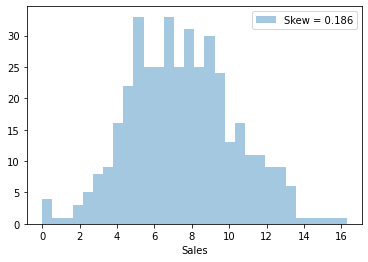

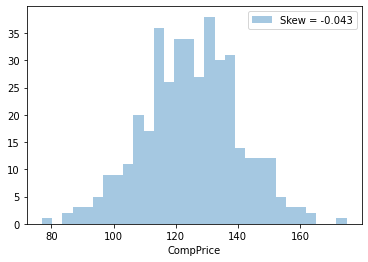

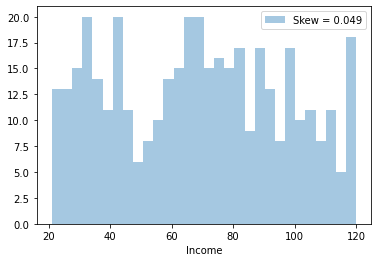

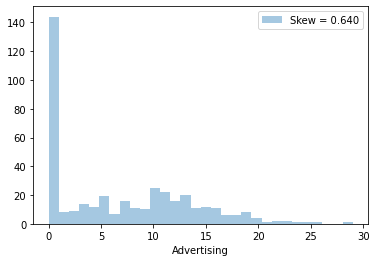

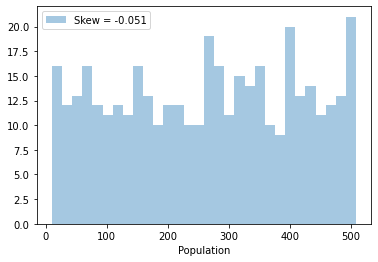

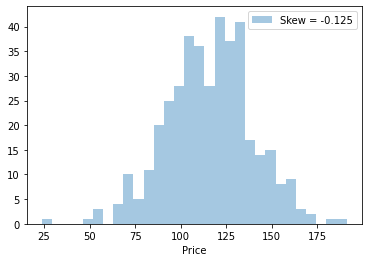

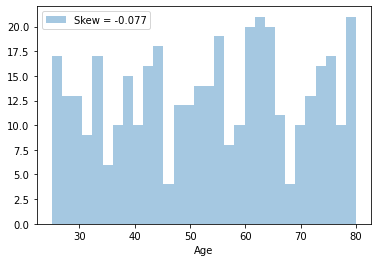

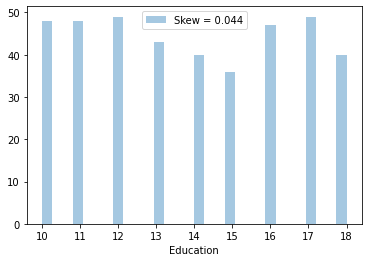

In [15]:
numerical_features=[feature for feature in CompData.columns if CompData[feature].dtypes != 'O']
for feat in numerical_features:
    skew = CompData[feat].skew()
    sns.distplot(CompData[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [16]:
# Detect observations with more than one outlier

def outlier_hunt(CompData):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in CompData.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(CompData[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(CompData[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = CompData[(CompData[col] < Q1 - outlier_step) | (CompData[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(CompData[numerical_features])))) 

The dataset contains 0 observations with more than 2 outliers


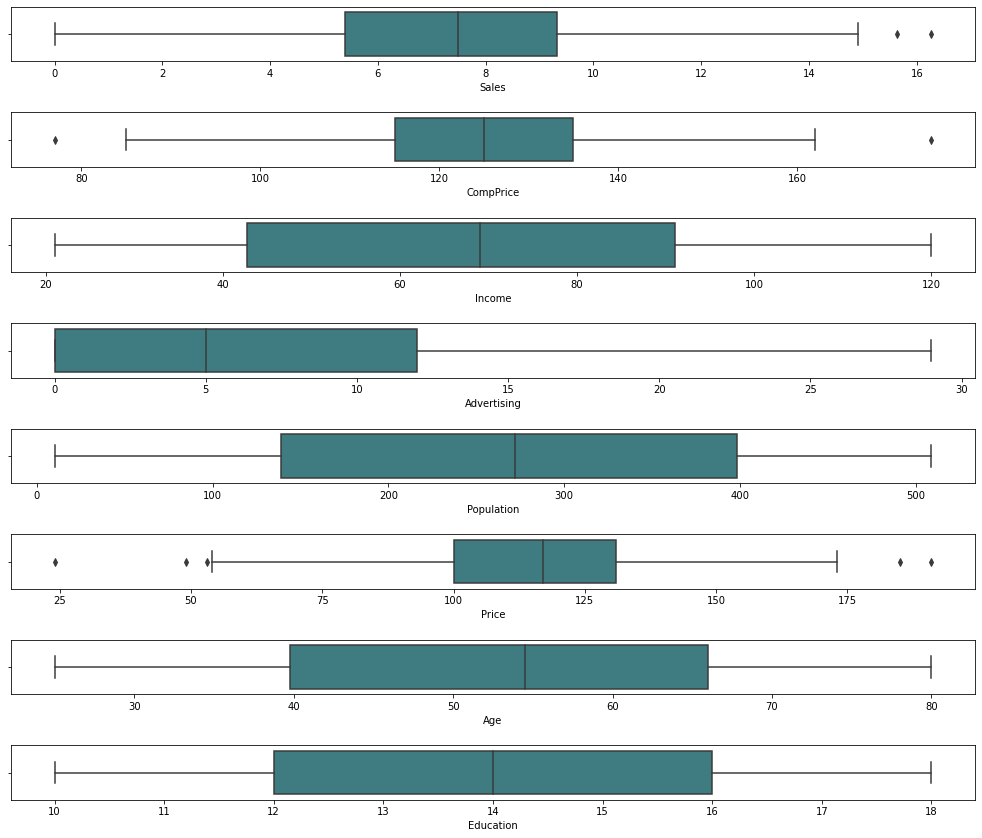

In [17]:
ot = CompData.copy() 
fig, axes = plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

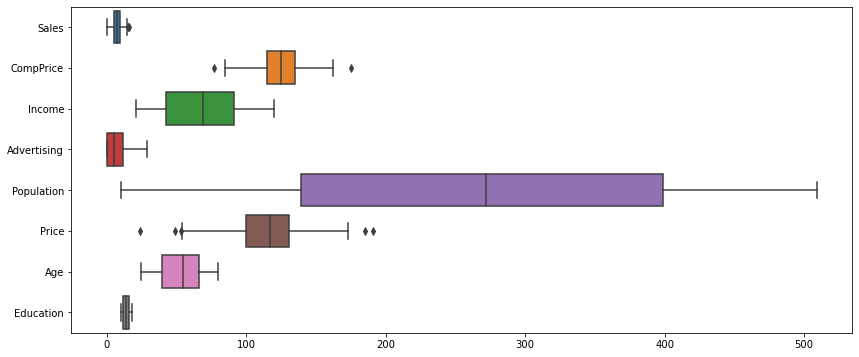

In [18]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=CompData[numerical_features], orient="h")

<Figure size 576x576 with 0 Axes>

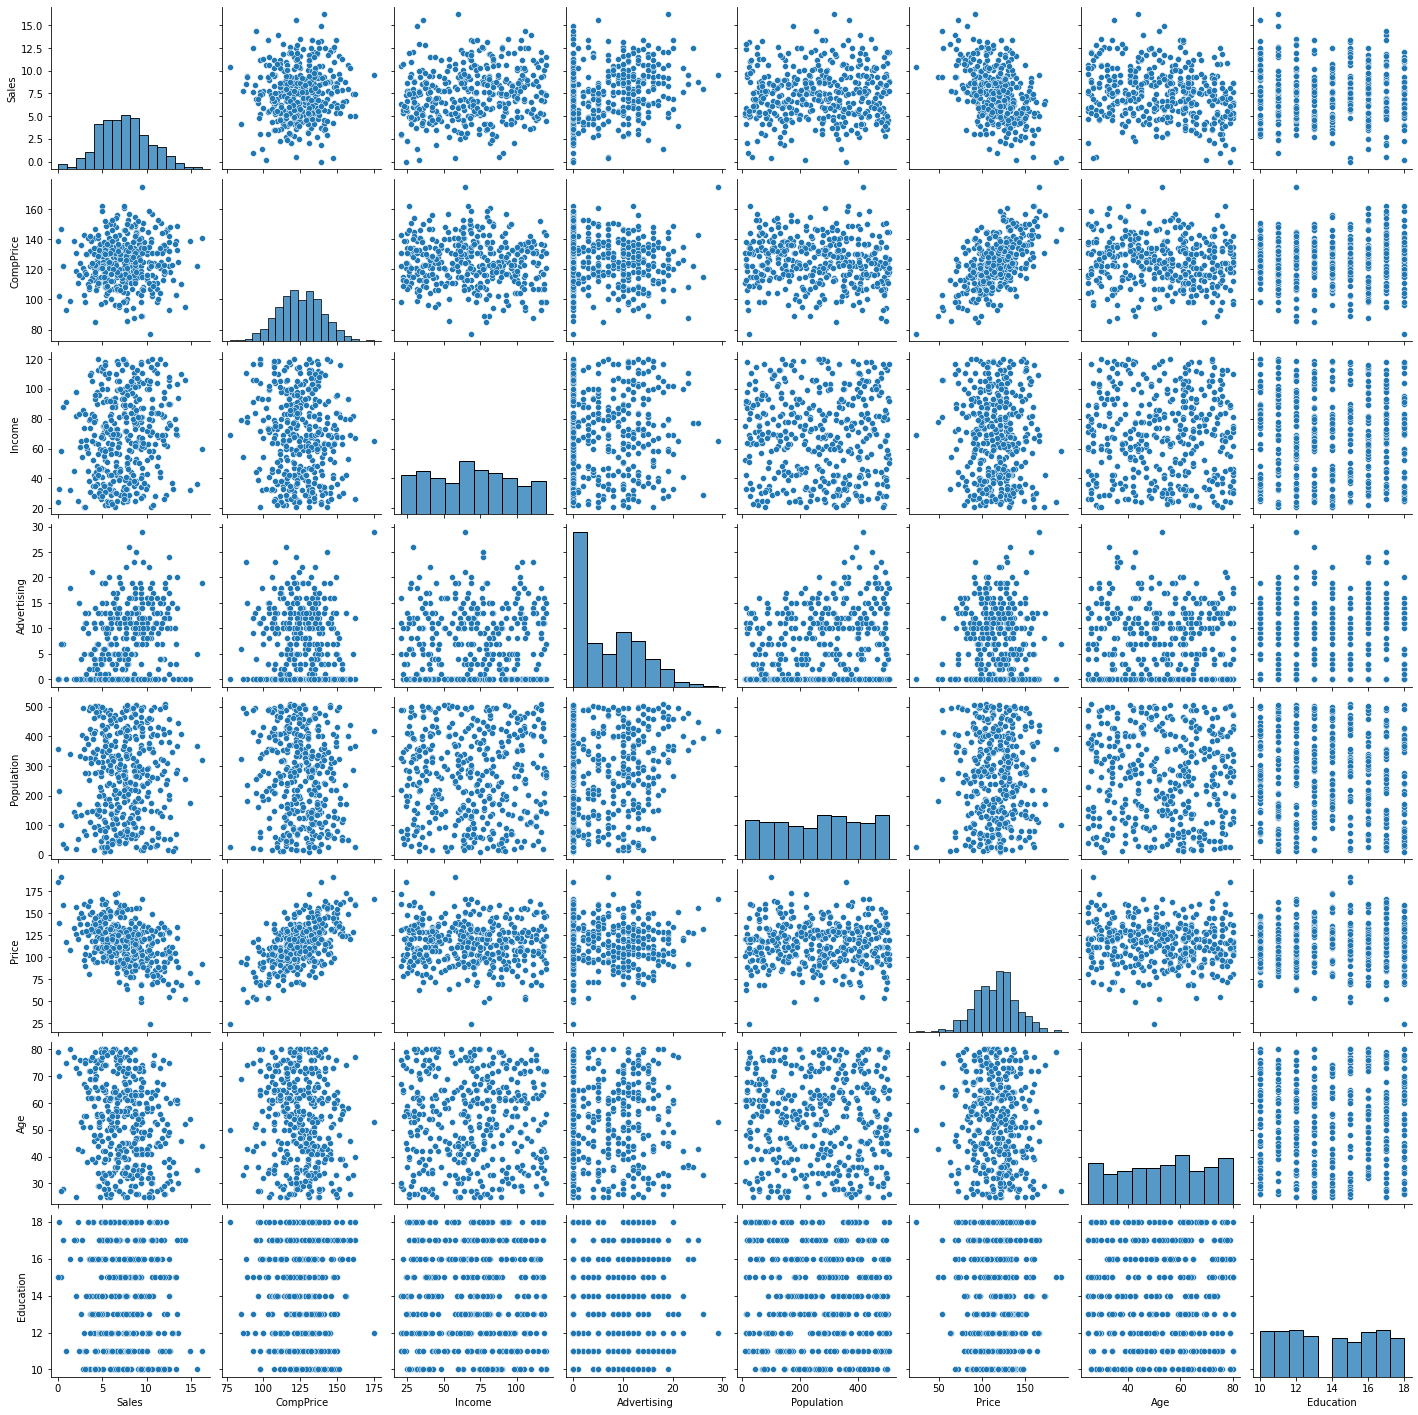

In [19]:
plt.figure(figsize=(8,8))
sns.pairplot(CompData, palette='coolwarm')
plt.show()

<AxesSubplot:>

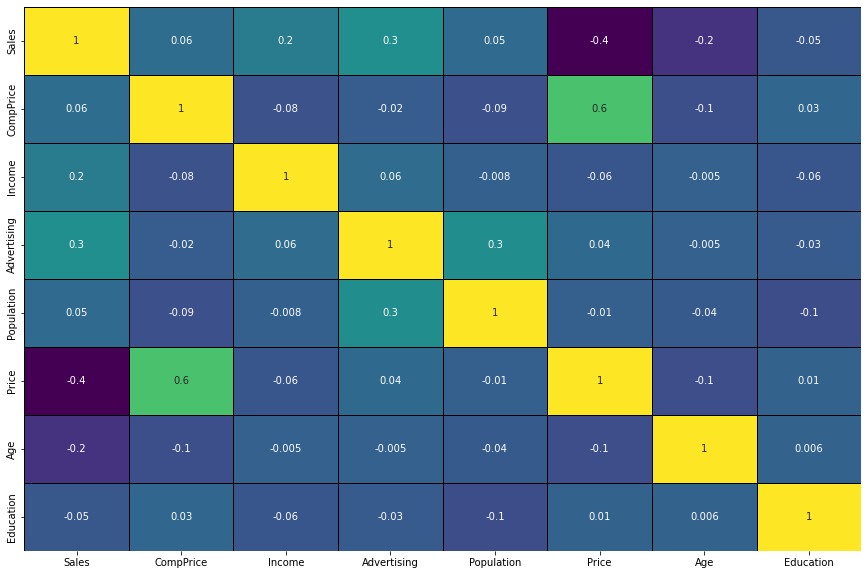

In [20]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(CompData.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


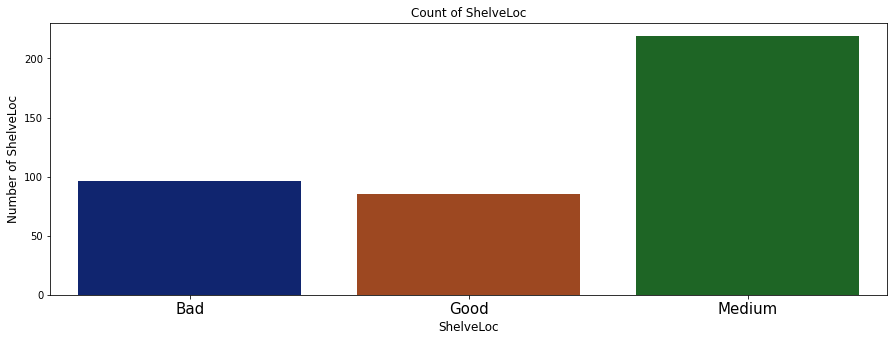

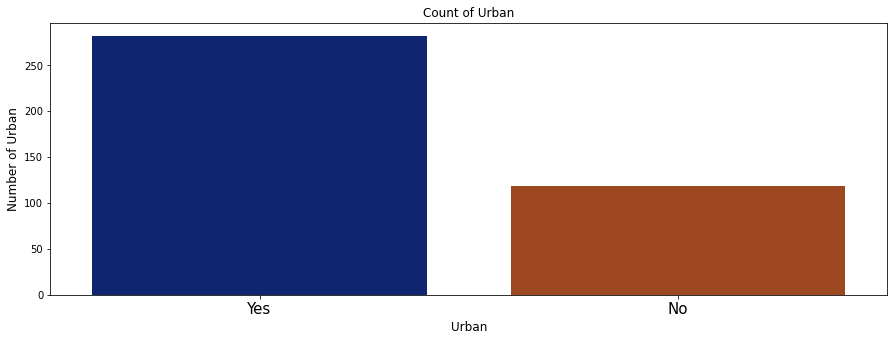

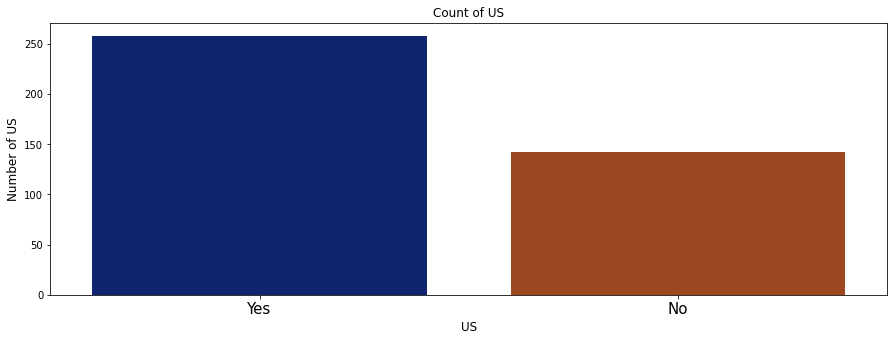

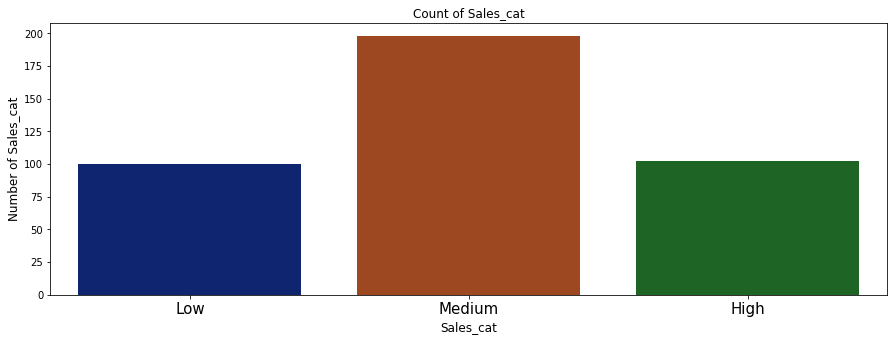

In [21]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = CompData1[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data = CompData1, x=column,palette = "dark")
    
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

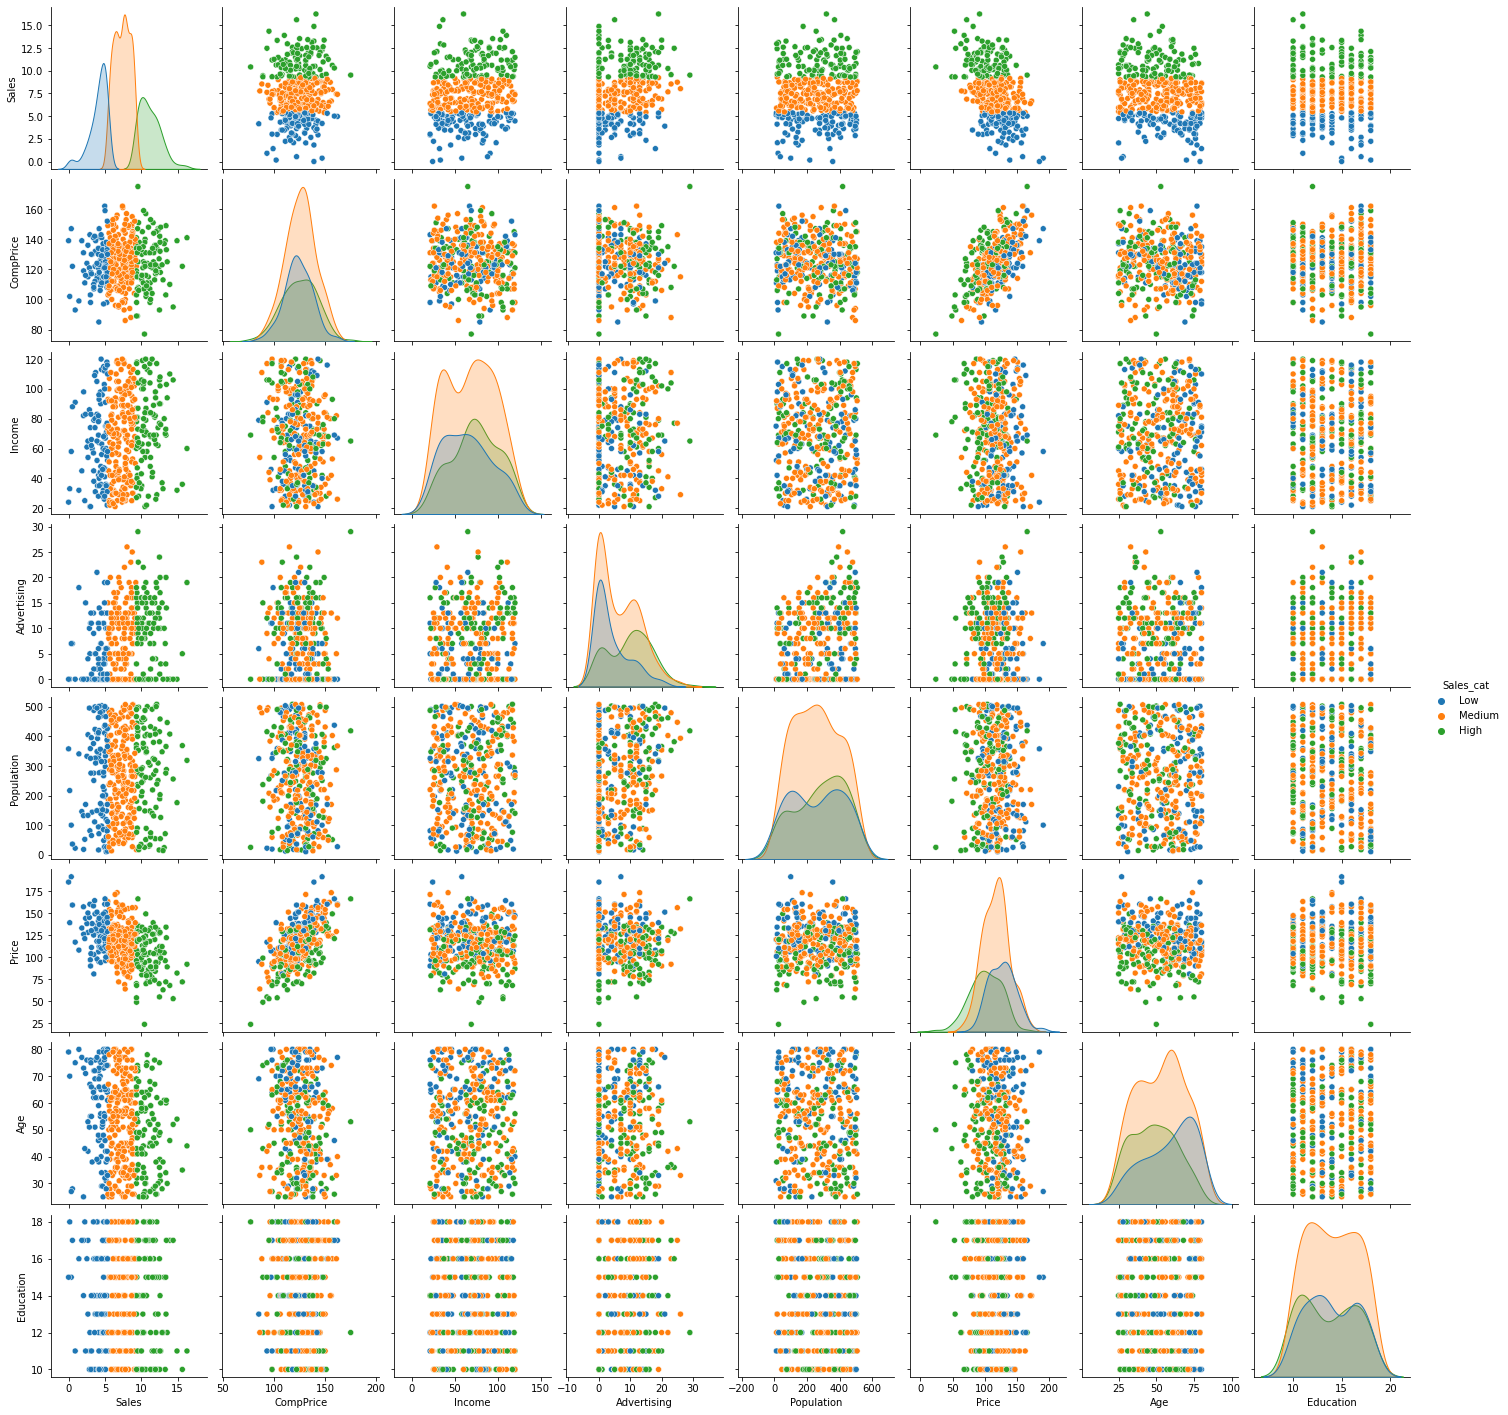

In [22]:
# let's plot pair plot to visualise the attributes all at once

sns.pairplot(data = CompData1, hue = 'Sales_cat')

In [23]:
Data_ = CompData1.copy()
Data_.drop('Sales',axis=1, inplace =True)
Data_ = pd.get_dummies(Data_.iloc[:,:-1])
Data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


Text(0.5, 1.0, 'Correlation with Sales \n')

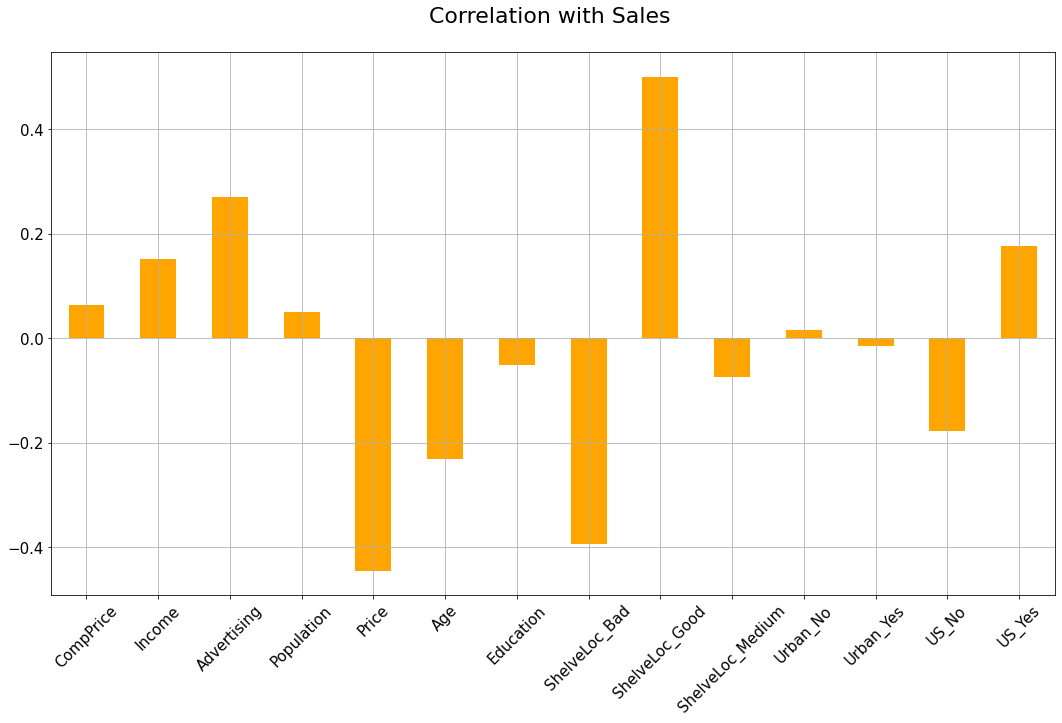

In [24]:
Data2 = Data_.copy()

correlations = Data2.corrwith(CompData1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (18, 10), fontsize = 15, color = 'orange',rot = 45, grid = True)
plt.title('Correlation with Sales \n',horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", fontfamily = "sans-serif")

#### Checking for Imbalanced or balanced dataset with regards to the Target 

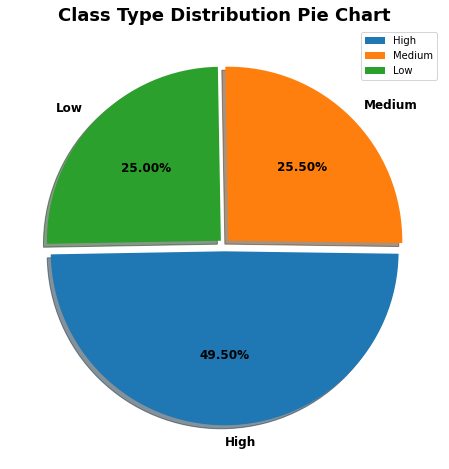

In [25]:
plt.figure(figsize = (12,8))
plt.pie(CompData1['Sales_cat'].value_counts(),labels = CompData1.Sales_cat.unique(),explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',shadow= True,startangle= 181,
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [26]:
CompData1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

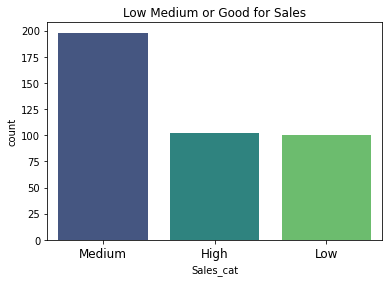

In [27]:
sns.countplot(x='Sales_cat', data=CompData1, palette = 'viridis', order = CompData1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

## Data Pre-Processing 

In [28]:
Data_ = CompData1.copy()
Data_.drop('Sales',axis=1, inplace =True)
Data_ = pd.get_dummies(Data_.iloc[:,:-1])
Data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [29]:
Data_['Sales'] = CompData1.Sales_cat
Data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [30]:
le = LabelEncoder()
le.fit(Data_["Sales"])
Data_["Sales"]=le.transform(Data_["Sales"])
Data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [31]:
# split into input (X) and output (y) variables
X = Data_.iloc[:, :-1]

y=  Data_.Sales

In [32]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [33]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [34]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [35]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
4,300.881058,Price
2,251.767458,Advertising
3,141.113336,Population
5,106.577639,Age
8,66.174919,ShelveLoc_Good
1,65.145403,Income
7,48.524460,ShelveLoc_Bad
12,13.109136,US_No
9,8.654770,ShelveLoc_Medium
13,7.215106,US_Yes


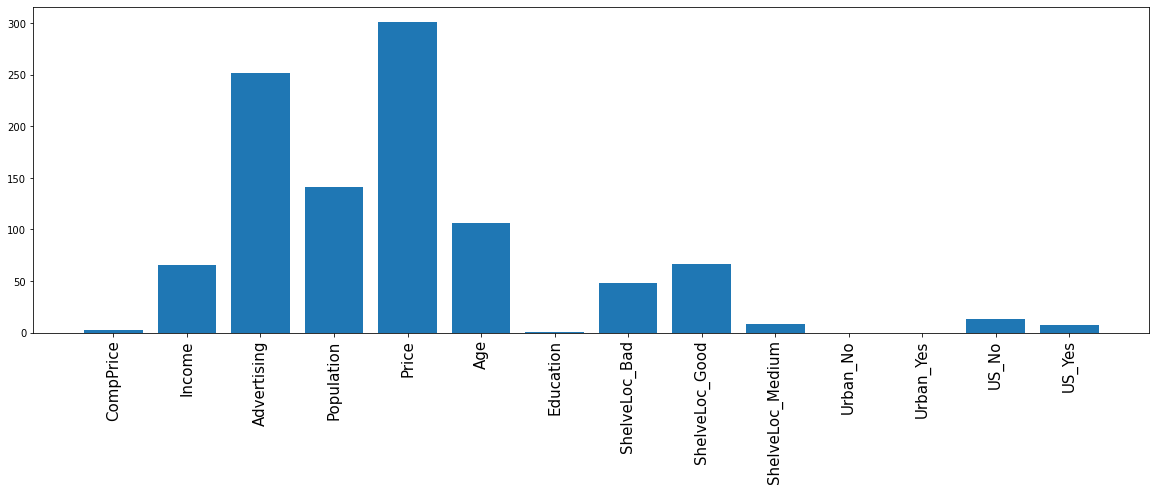

In [36]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

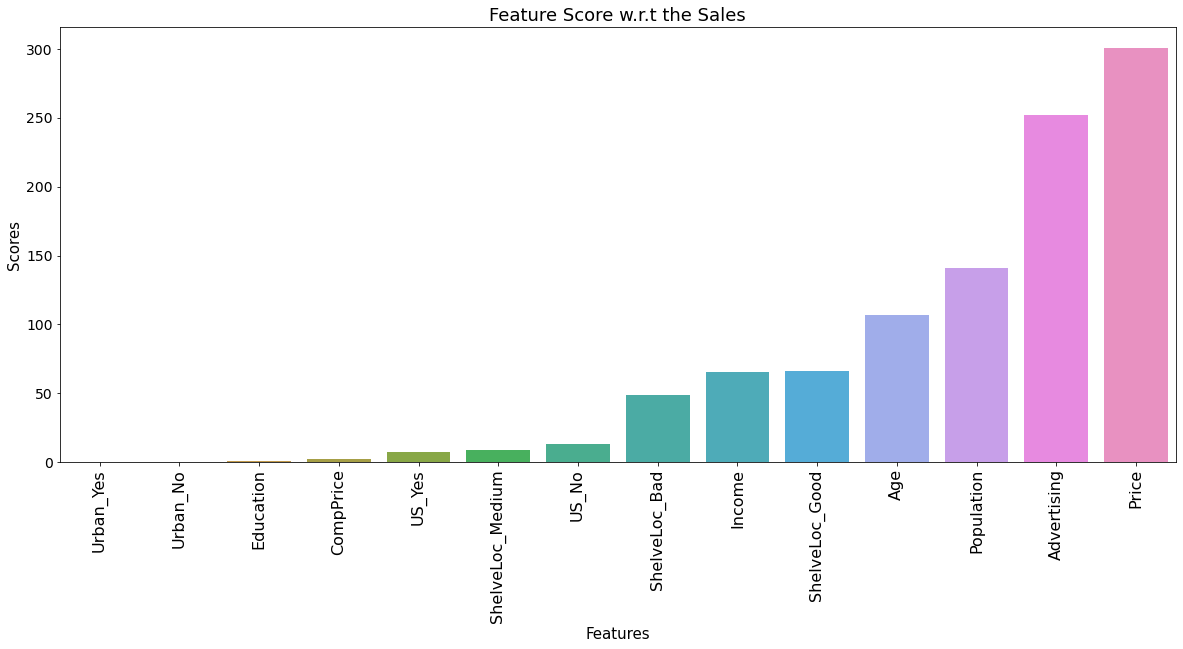

In [37]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',y="Score", data = score_df, order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [38]:
model_data = Data_[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 
                    'ShelveLoc_Medium','Sales']]
model_data.head()

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,Sales
0,120,11,276,73,42,0,1,0,0
1,83,16,260,48,65,1,0,0,0
2,80,10,269,35,59,0,0,1,0
3,97,4,466,100,55,0,0,1,2
4,128,3,340,64,38,0,1,0,1


# Random Forest Built-in Feature Importance 

In [39]:
classifier_rf = RandomForestClassifier(random_state =42, n_jobs =-1, max_depth =5,n_estimators =100, oob_score=True)

#%%time
classifier_rf.fit(X, y)

# checking the oob score
print('checking the oob score',classifier_rf.oob_score_)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10,25,30,50,100,200]}

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X, y)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

checking the oob score 0.635
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.66
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


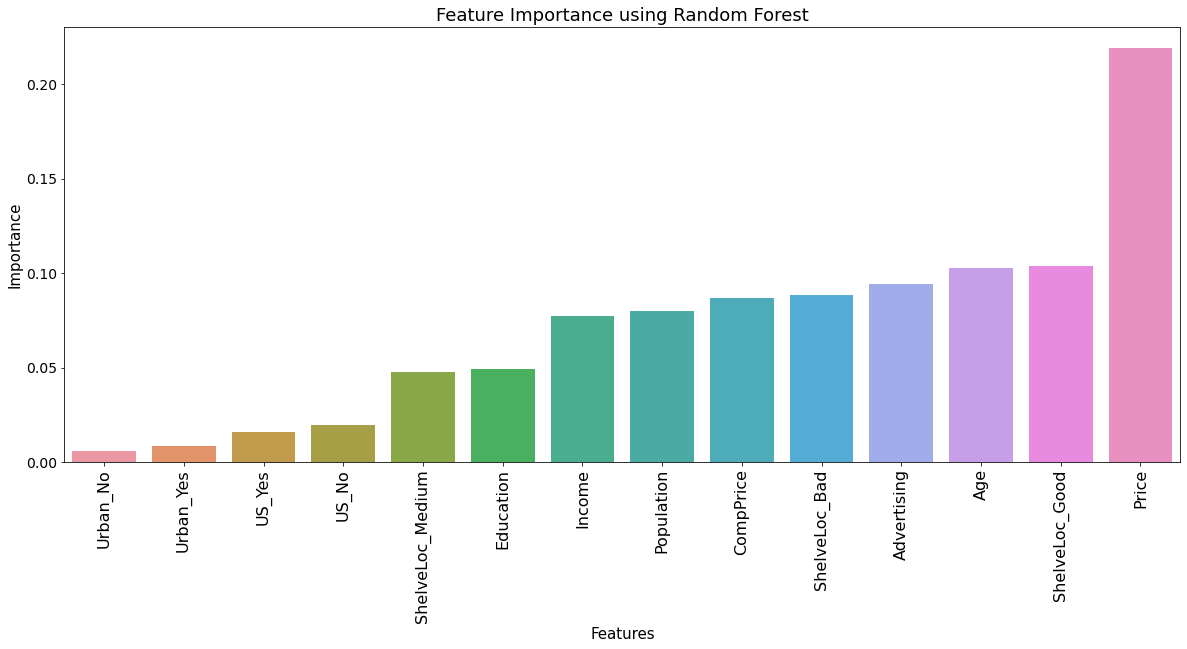

In [40]:
# Now let’s sort the data with the help of feature importance

rf_best.feature_importances_
imp_df = pd.DataFrame({"Feature": X.columns,"Importance": rf_best.feature_importances_})

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x ='Feature',y ="Importance", data =imp_df, order =imp_df.sort_values('Importance').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Importance using Random Forest", size=18)
plt.show()

### Test Train Split 

In [41]:
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [42]:
y.unique()

array([0, 2, 1])

In [43]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 0: 10, 1: 10})


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [45]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 139, 0: 71, 1: 70}) Testing Data Counter({2: 59, 0: 31, 1: 30})


In [46]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


### Grid search using Stratified Kfold Splits 

In [47]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    92.0  90.0  178.0       1.0      360.0         360.0
_______________________________________________
Confusion Matrix: 
 [[ 92   0   0]
 [  0  90   0]
 [  0   0 178]]

Test Result:
Accuracy Score: 62.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy  macro avg  weighted avg
precision   0.800000   0.555556   0.615385     0.625   0.656980      0.646581
recall      0.400000   0.500000   0.800000     0.625   0.566667      0.625000
f1-score    0.533333   0.526316   0.695652     0.625   0.585100      0.612738
support    10.000000  10.000000  20.0

### Grid search using Train Test Splits Stratifying Target feature 

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    71.0  70.0  139.0       1.0      280.0         280.0
_______________________________________________
Confusion Matrix: 
 [[ 71   0   0]
 [  0  70   0]
 [  0   0 139]]

Test Result:
Accuracy Score: 64.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.740741   0.600000   0.617647  0.641667    0.652796      0.645034
recall      0.645161   0.500000   0.711864  0.641667    0.619009      0.641667
f1-score    0.689655   0.545455   0.661417  0.641667    0.632176      0.639721
support    31.000000  30.000000  

# Random Forest

In [50]:
# Random Forest hyperparameter tuning

#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [51]:
loc = np.array(score_array).max()
score_array.index(loc)+1

34

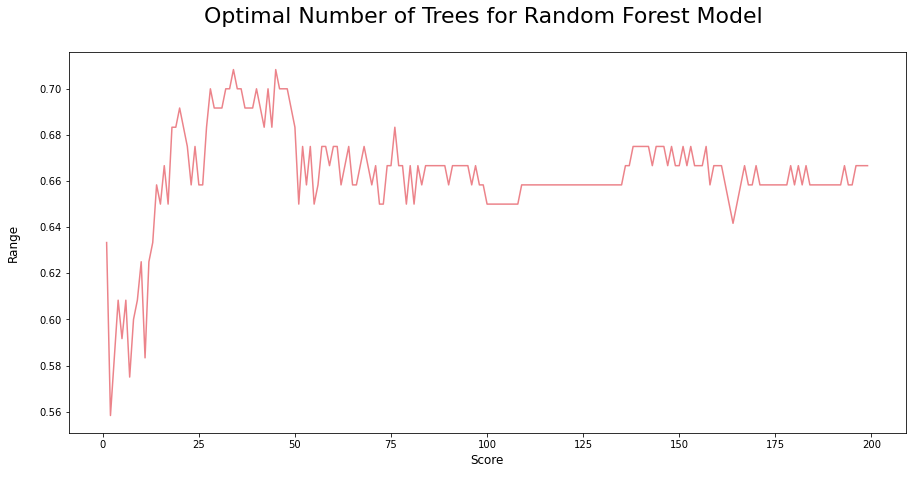

In [52]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", 
          fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [53]:
# Randomized Search Cross Validation

n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 87.14%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.921875   0.890625    0.842105  0.871429    0.884868   
recall      0.830986   0.814286    0.920863  0.871429    0.855378   
f1-score    0.874074   0.850746    0.879725  0.871429    0.868182   
support    71.000000  70.000000  139.000000  0.871429  280.000000   

           weighted avg  
precision      0.874463  
recall         0.871429  
f1-score       0.871047  
support      280.000000  
_______________________________________________
Confusion Matrix: 
 [[ 59   1  11]
 [  0  57  13]
 [  5   6 128]]

Test Result:
Accuracy Score: 65.83%
_______________________________________________
CLASSIFI

In [54]:
# Visualizing one of the decision tree in random forest

rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=4,
                       n_estimators=195, random_state=42)

In [55]:
CompData1.Sales_cat.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

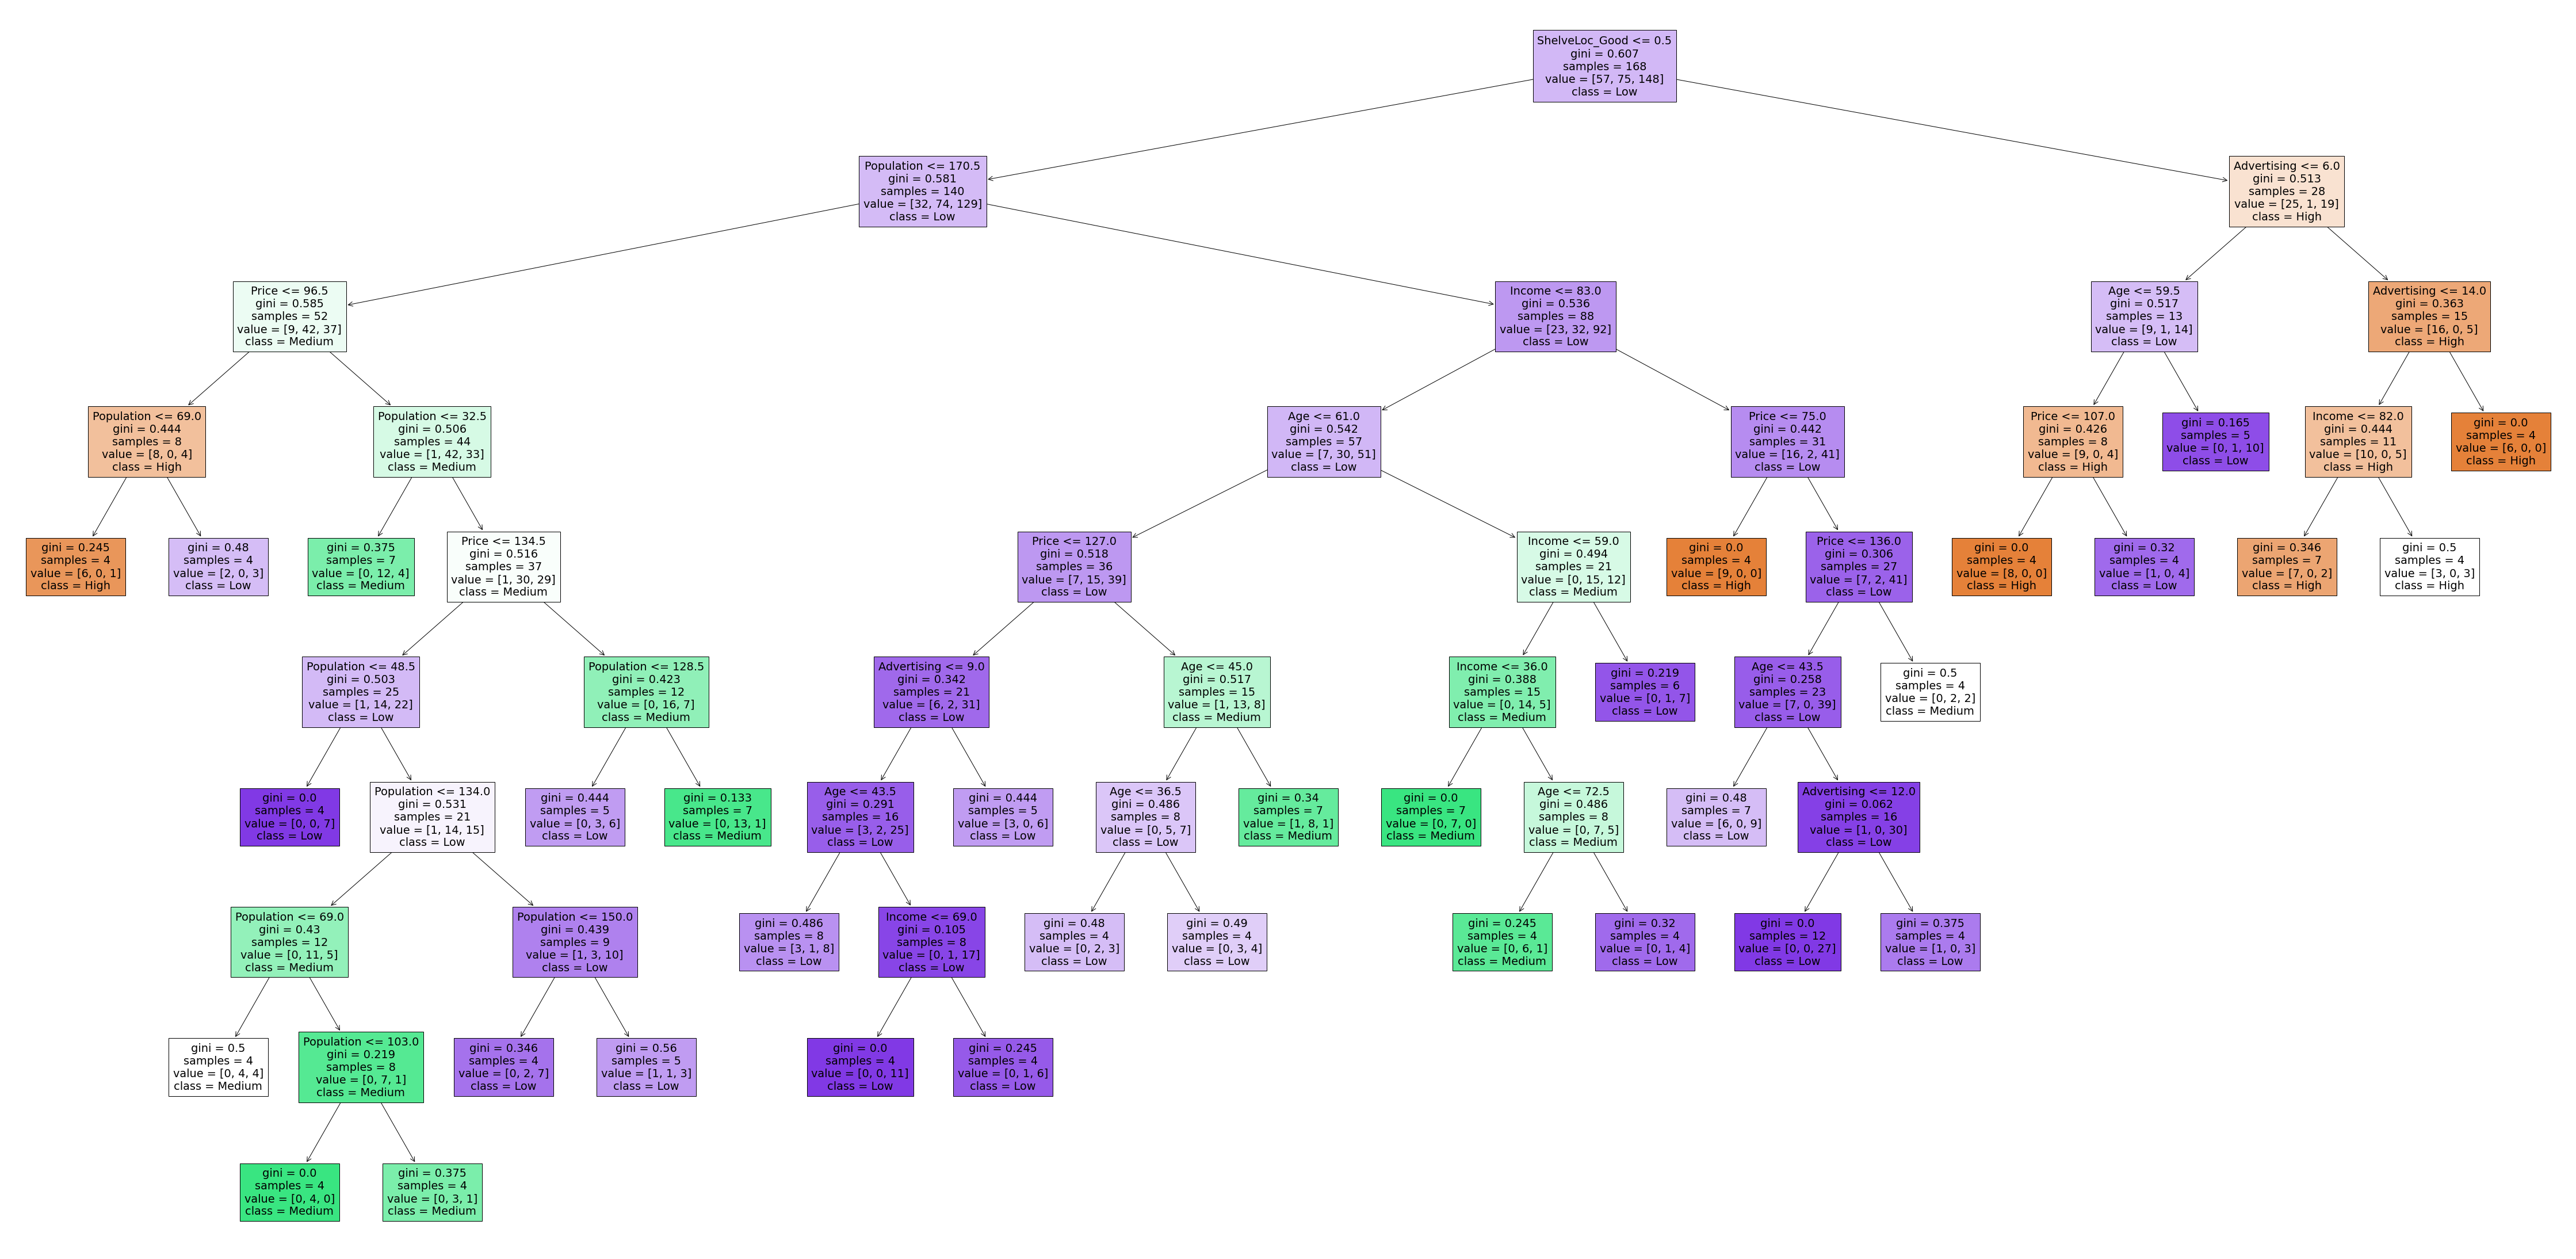

In [56]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[190], feature_names = model_data.columns,class_names= CompData1.Sales_cat.unique(),filled=True)
plt.show()